# Análisis Exploratorio del dataset de Ventas de Lácteos 2024
Este notebook carga el CSV procesado para observar dimensiones, tipos, nulos y duplicados; se guardan luego gráficas y tablas en `src/results` para documentar Hallazgos y preparar el análisis inferencial.

## Configuración
Utilizamos `Path` para mantener rutas relativas y `pandas`, `seaborn` con tipado ligero para trabajar con los datos.

In [5]:
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
from scipy import stats
sns.set_theme(style='whitegrid')
warnings.filterwarnings('always', category=UserWarning)
RESULTS_DIR = Path('src') / 'results'

RESULTS_DIR.mkdir(parents=True, exist_ok=True)

def cargar_dataset_procesado(ruta: Path) -> pd.DataFrame:
    if not ruta.exists():
        raise FileNotFoundError(f'Ejecuta el pipeline de transformación antes de correr este notebook: {ruta}')
    return pd.read_csv(ruta)

RUTA_PROCESADA = Path('data') / 'processed' / 'ventas_lacteos_2024.csv'
df_procesado = cargar_dataset_procesado(RUTA_PROCESADA)
df_procesado

,fecha,mes_venta,nombre_del_vendedor,nombre_del_supermercado,representante_de_compras,estado,ciudad,categoria,producto,presentacion,precio_unitario_usd,cantidad_comprada,valor_total_usd,forma_pago,tipo_producto
0,2024-03-11,2024-03,Zeller Sophie,Exquisite Foods Market,Rogers Harper,California,San Diego,Quesos,Queso en lonchas,Paquete 200g,3.80,543,2063.40,Tarjeta de crédito,Queso en lonchas
1,2024-07-26,2024-07,Smith Noah,The Food Barn,Tremblay Ana,Florida,Tampa,Otros,Suero de leche,Botella 1L,2.00,334,668.00,Tarjeta de débito,Suero de leche
2,2024-01-12,2024-01,Zeller Sophie,The Grocery Store,McBride Evelyn,California,San Diego,Quesos,Queso blanco,Bloque 500g,5.00,73,365.00,Tarjeta de débito,Queso blanco
3,2024-06-03,2024-06,Williams Chloe,Select Market,Bélanger Theodore,Nueva York,New York City,Yogur,Kumis,Botella 1L,2.50,658,1645.00,Efectivo,Kumis
4,2024-11-04,2024-11,Davis Olivia,Super Everything,Fraser Michael,California,San Francisco,Mantequilla,Mantequilla clarificada (ghee),Frasco 300ml,5.75,667,3835.25,PayPal,Mantequilla clarificada (ghee)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2024-07-15,2024-07,Davis Olivia,The Pantry,Wilson Ethan,Florida,Jacksonville,Mantequilla,Mantequilla clarificada (ghee),Frasco 300ml,5.75,894,5140.50,PayPal,Mantequilla clarificada (ghee)
9996,2024-12-19,2024-12,Davis Olivia,Select Market,Bélanger Theodore,Nueva York,New York City,Mantequilla,Mantequilla con sal,Paquete 454g,4.00,264,1056.00,PayPal,Mantequilla con sal
9997,2024-11-12,2024-11,Anderson James,The Pantry,Wilson Ethan,Florida,Miami,Quesos,Queso mozzarella,Paquete 200g,3.75,527,1976.25,Efectivo,Queso mozzarella
9998,2024-03-22,2024-03,Lee Charlotte,The Little Bee,Hunter Mark,Massachusetts,Lowell,Otros,Dulce de leche,Frasco 250g,3.00,505,1515.00,Efectivo,Dulce de leche


## Inspección básica
Revisamos dimensiones, tipos, nulos y duplicados para reconocer calidad de datos antes de graficar.

In [6]:
print('Dimensiones del dataset:', df_procesado.shape)
print('Tipos de datos:', df_procesado.dtypes)
print('Valores nulos por columna:', df_procesado.isnull().sum())
print('Registros duplicados:', df_procesado.duplicated().sum())
df_procesado.head()

Dimensiones del dataset: (10000, 15)
Tipos de datos: fecha                        object
mes_venta                    object
nombre_del_vendedor          object
nombre_del_supermercado      object
representante_de_compras     object
estado                       object
ciudad                       object
categoria                    object
producto                     object
presentacion                 object
precio_unitario_usd         float64
cantidad_comprada             int64
valor_total_usd             float64
forma_pago                   object
tipo_producto                object
dtype: object
Valores nulos por columna: fecha                       0
mes_venta                   0
nombre_del_vendedor         0
nombre_del_supermercado     0
representante_de_compras    0
estado                      0
ciudad                      0
categoria                   0
producto                    0
presentacion                0
precio_unitario_usd         0
cantidad_comprada           0
valor_

,fecha,mes_venta,nombre_del_vendedor,nombre_del_supermercado,representante_de_compras,estado,ciudad,categoria,producto,presentacion,precio_unitario_usd,cantidad_comprada,valor_total_usd,forma_pago,tipo_producto
0,2024-03-11,2024-03,Zeller Sophie,Exquisite Foods Market,Rogers Harper,California,San Diego,Quesos,Queso en lonchas,Paquete 200g,3.80,543,2063.40,Tarjeta de crédito,Queso en lonchas
1,2024-07-26,2024-07,Smith Noah,The Food Barn,Tremblay Ana,Florida,Tampa,Otros,Suero de leche,Botella 1L,2.00,334,668.00,Tarjeta de débito,Suero de leche
2,2024-01-12,2024-01,Zeller Sophie,The Grocery Store,McBride Evelyn,California,San Diego,Quesos,Queso blanco,Bloque 500g,5.00,73,365.00,Tarjeta de débito,Queso blanco
3,2024-06-03,2024-06,Williams Chloe,Select Market,Bélanger Theodore,Nueva York,New York City,Yogur,Kumis,Botella 1L,2.50,658,1645.00,Efectivo,Kumis
4,2024-11-04,2024-11,Davis Olivia,Super Everything,Fraser Michael,California,San Francisco,Mantequilla,Mantequilla clarificada (ghee),Frasco 300ml,5.75,667,3835.25,PayPal,Mantequilla clarificada (ghee)


## Estadísticas por categoría
Agrupamos `valor_total_usd` por `categoria` para guardar una tabla que luego incorporaremos en el README y SPSS.

In [7]:
confidence_level = 0.95
resultados = []
for col in df_procesado.columns:
    if pd.api.types.is_numeric_dtype(df_procesado[col]) and not (col.lower().startswith("id") or col.lower().endswith("id")):
        sample = df_procesado[col].dropna()  # eliminamos nulos
        n = len(sample)
        mean = np.mean(sample)
        std_err = stats.sem(sample)

        intervalo = stats.t.interval(confidence_level, n-1, loc=mean, scale=std_err)
        intervalo = tuple(round(x, 2) for x in intervalo)

        proc_stats = {
            "Variable": col,
            "Media": round(sample.mean(), 2),
            "Mediana": round(sample.median(), 2),
            "Moda": round(sample.mode()[0], 2),
            "Varianza": round(sample.var(), 2),
            "Desviación estándar": round(sample.std(), 2),
            "Rango": round(sample.max() - sample.min(), 2),
            "Q25": round(np.percentile(sample, 25), 2),
            "Q50": round(np.percentile(sample, 50), 2),
            "Q75": round(np.percentile(sample, 75), 2),
            "IC 95% Inferior": round(intervalo[0], 2),
            "IC 95% Superior": round(intervalo[1], 2)
        }

        resultados.append(proc_stats)

# Crear un DataFrame con todos los resultados
df_estadisticas = pd.DataFrame(resultados)

# Mostrar
df_estadisticas

,Variable,Media,Mediana,Moda,Varianza,Desviación estándar,Rango,Q25,Q50,Q75,IC 95% Inferior,IC 95% Superior
0,precio_unitario_usd,3.25,3.0,2.5,2.53,1.59,5.6,2.0,3.0,4.20,3.22,3.28
1,cantidad_comprada,498.72,493.0,216.0,82148.40,286.62,990.0,251.0,493.0,746.25,493.10,504.34
2,valor_total_usd,1620.50,1250.0,276.0,1719954.38,1311.47,6222.5,588.0,1250.0,2334.00,1594.80,1646.21


In [9]:
tabla_categorias = (
    df_procesado
    .groupby('categoria', sort=True)
    .agg(
        registros=('valor_total_usd', 'count'),
        media=('valor_total_usd', 'mean'),
        desviacion=('valor_total_usd', 'std'),
        minimo=('valor_total_usd', 'min'),
        maximo=('valor_total_usd', 'max'),
    )
    .sort_values('registros', ascending=False)
)
tabla_categorias.to_html(RESULTS_DIR / 'tabla_estadisticas_categorias.html', index=True, float_format='%.2f')
tabla_categorias

,registros,media,desviacion,minimo,maximo
categoria,,,,,
Mantequilla,1712,2327.752687,1401.983725,44.0,5738.5
Leche,1691,933.776523,838.759788,15.0,5417.5
Otros,1677,1263.967919,864.826425,16.5,4250.0
Quesos,1659,2415.081947,1511.290715,45.0,6237.5
Yogur,1640,910.849146,694.034863,18.0,3409.0
Cremas,1621,1863.546249,1356.251762,25.0,5990.0


## Visualizaciones clave
Generamos histogramas y gráficos por categoría. Cada figura se guarda en `src/results` para reproducibilidad.

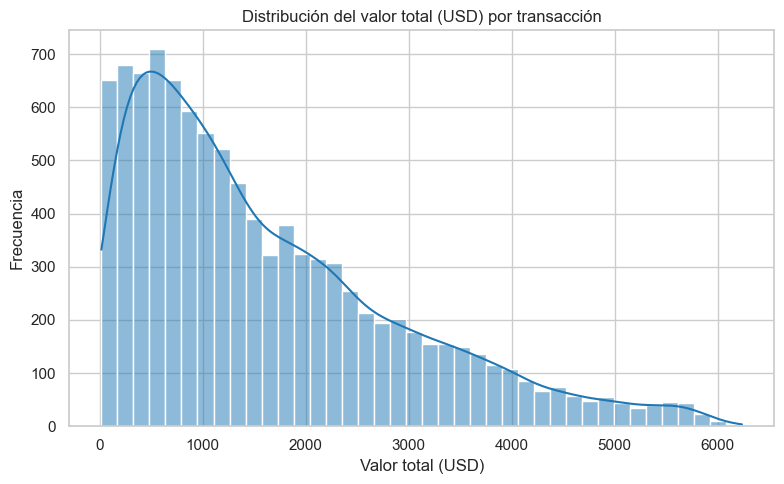

In [3]:
plt.figure(figsize=(8, 5))
sns.histplot(df_procesado['valor_total_usd'], bins=40, kde=True, color='#1f77b4')
plt.title('Distribución del valor total (USD) por transacción')
plt.xlabel('Valor total (USD)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.savefig(RESULTS_DIR / 'hist_valor_total.jpg')
plt.show()

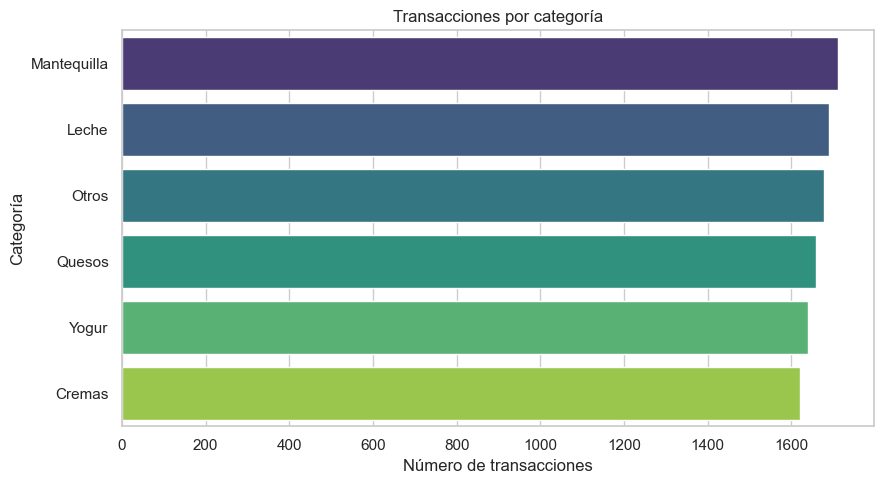

In [11]:
plt.figure(figsize=(9, 5))
tabla_categorias_plot = tabla_categorias.reset_index()
sns.barplot(
    data=tabla_categorias_plot,
    x='registros',
    y='categoria',
    hue='categoria',
    palette='viridis'
)
plt.title('Transacciones por categoría')
plt.xlabel('Número de transacciones')
plt.ylabel('Categoría')
plt.tight_layout()
plt.savefig(RESULTS_DIR / 'barras_categoria.jpg')
plt.show()

C:\Users\alist\AppData\Local\Temp\ipykernel_17052\3987655946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


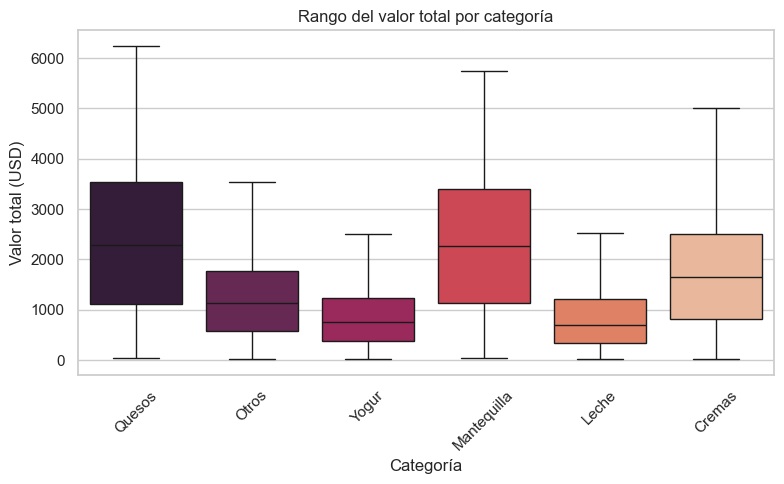

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_procesado,
    x='categoria',
    y='valor_total_usd',
    palette='rocket',
    showfliers=False
)
plt.title('Rango del valor total por categoría')
plt.xlabel('Categoría')
plt.ylabel('Valor total (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(RESULTS_DIR / 'boxplot_categoria.jpg')
plt.show()

## Hallazgos
1. Las categorías clave (p. ej., Quesos, Leche, Yogur) dominan tanto el número de transacciones como el valor promedio, lo cual sugiere priorizar su análisis inferencial.
2. La distribución del valor total presenta una cola derecha moderada, así que se debe vigilar la homogeneidad de varianzas en la prueba.
3. Las gráficas y la tabla quedan almacenadas en `src/results`, por lo que las podemos usar en el informe y en SPSS.

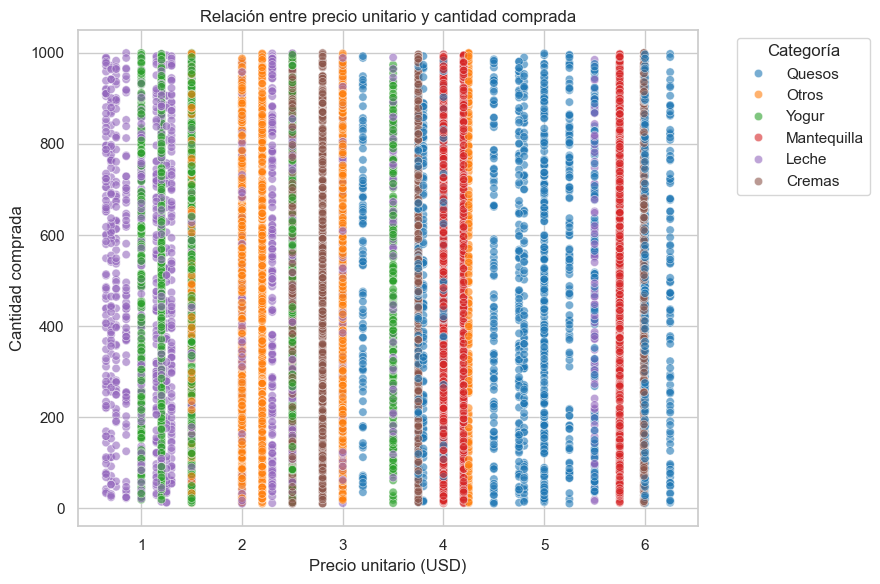

In [6]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df_procesado,
    x='precio_unitario_usd',
    y='cantidad_comprada',
    hue='categoria',
    alpha=0.6,
    palette='tab10',
)
plt.title('Relación entre precio unitario y cantidad comprada')
plt.xlabel('Precio unitario (USD)')
plt.ylabel('Cantidad comprada')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(RESULTS_DIR / 'scatter_precio_vs_cantidad.jpg')
plt.show()

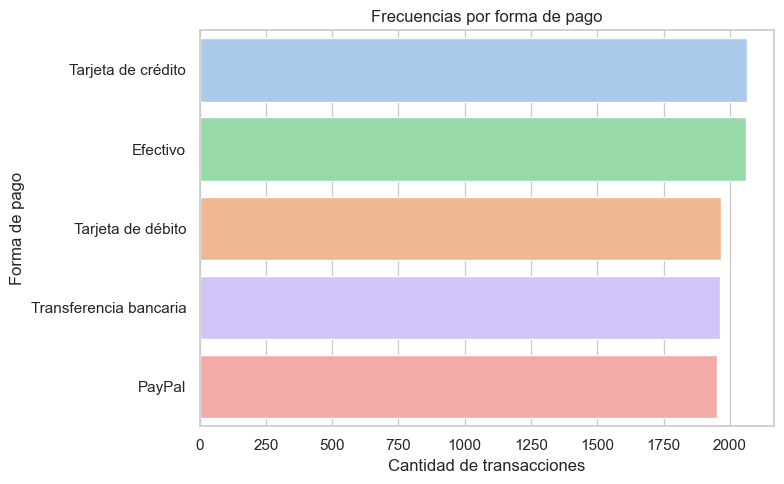

In [10]:
plt.figure(figsize=(8, 5))
orden_pago = df_procesado['forma_pago'].value_counts().index
sns.countplot(
    data=df_procesado,
    y='forma_pago',
    order=orden_pago,
    hue='forma_pago',
    legend=False,    
    palette='pastel'
    
)
plt.title('Frecuencias por forma de pago')
plt.xlabel('Cantidad de transacciones')
plt.ylabel('Forma de pago')
plt.tight_layout()
plt.savefig(RESULTS_DIR / 'count_forma_pago.jpg')
plt.show()


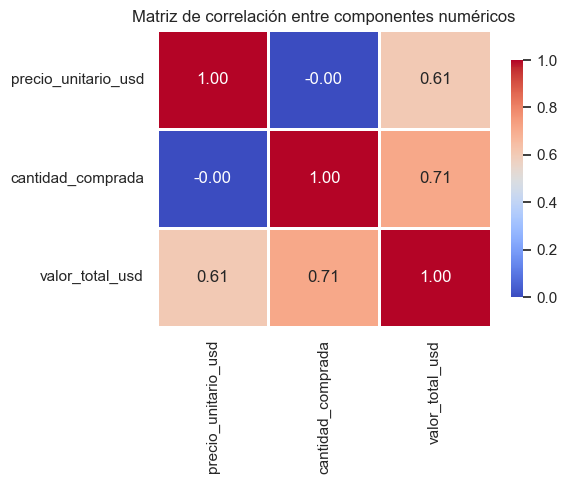

In [8]:
componentes = ['precio_unitario_usd', 'cantidad_comprada', 'valor_total_usd']
corr_matrix = df_procesado[componentes].corr()
corr_matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.8,
    cbar_kws={'shrink': 0.8},
)
plt.title('Matriz de correlación entre componentes numéricos')
plt.tight_layout()
plt.savefig(RESULTS_DIR / 'heatmap_correlacion.jpg')
plt.show()